<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
 - Layer of 3 input nodes that take in the outside information and pass in into the network to the hidden nodes in the hidden layer as outputs 1, X1, and X2.
### Hidden Layer:
- Layer of 3 hidden nodes that compute and transfer information recieved from the input nodes to the output nodes.  1 bias node with output of 1, 2 other outputs are dependent on the input layer and the weights.
### Output Layer:
- Layer of 2 output nodes that compute and transfer information recieved from the hidden nodes to the outside world, Y1 and Y2 are the values calculated.

![feedforward neural network](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-4-19-50-am.png?w=996&h=736)

### Neuron:
 - Basic unit of computation in a neural network, recieves an input and computes an output. 
### Weight:
 - Each input has a weight, size of weight is based on relative importance to the other inputs.

![Single Neuron](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=1024&h=547)
### Activation Function:
The function f, introduces non-linearity into the output of a neuron, most real world data is not linear. Sigmmoid, Tanh, Relu are types of activation functions.

![Activation Function](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-08-at-11-53-41-am.png?w=1493)
### Node Map:
 - An overview of the layout and routes of the neural network.

![Node Map](https://scikit-learn.org/stable/_images/multilayerperceptron_network.png)
### Perceptron:
- Perceptron has 4 parts, input values, weights and bias, netsum ,and activation function, inputs multipled by weights, weights adde together, apply weighted sum to activation function.

 ![Perceptron](https://miro.medium.com/max/2583/1*n6sJ4yZQzwKL9wnF5wnVNg.png)


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Information is taken in by the input layer and then fed into the hidden layer where computation is done with weights, bias, and an activation function, the output layer recieves the informaton from the hidden layer and does more computation similar the the hidden later to get the final output.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [2]:
import numpy as np

inputs = np.array([
                  [0, 0, 1],
                  [1, 0, 1],
                  [0, 1, 1],
                  [1, 1, 1]
])

correct_outputs = [[1], [1], [1], [0]]
print('inputs :', inputs)
print('correct outputs :', correct_outputs)

inputs : [[0 0 1]
 [1 0 1]
 [0 1 1]
 [1 1 1]]
correct outputs : [[1], [1], [1], [0]]


In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [4]:
weights = np.array([[1], [1], [-1.5]])
weights

array([[ 1. ],
       [ 1. ],
       [-1.5]])

In [5]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[-1.5],
       [-0.5],
       [-0.5],
       [ 0.5]])

In [6]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.18242552],
       [0.37754067],
       [0.37754067],
       [0.62245933]])

In [7]:
error = correct_outputs - activated_output
error

array([[ 0.81757448],
       [ 0.62245933],
       [ 0.62245933],
       [-0.62245933]])

In [8]:
adjustments = error * sigmoid_derivative(activated_output)
adjustments

array([[ 0.2027025 ],
       [ 0.15019874],
       [ 0.15019874],
       [-0.1414639 ]])

In [9]:
weights = weights + np.dot(inputs.T, adjustments)
weights

array([[ 1.00873484],
       [ 1.00873484],
       [-1.13836392]])

In [10]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-11.83730984]
 [-11.83730984]
 [ 17.80483027]]
Output after training
[[0.99999998]
 [0.9974457 ]
 [0.9974457 ]
 [0.0028158 ]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [11]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [12]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

features = list(diabetes)[:-1]
scaler = MinMaxScaler()
X = scaler.fit_transform(diabetes[features])
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [13]:
y = diabetes.iloc[:, 8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

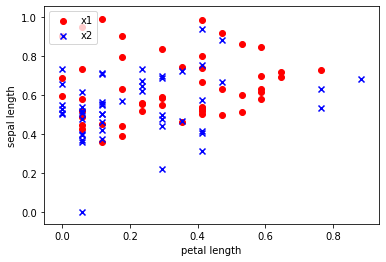

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='x1')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='x2')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [0]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10000):
        self.niter = niter
    
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                predicted = self.predict(xi)
                delta_w = self.rate * (target - predicted)
                self.weight[1:] = self.weight[1:] + delta_w * xi
                self.weight[0] = self.weight[0] + delta_w
                if delta_w != 0.0:
                    err = err + 1
            self.errors.append(err)
        return self

    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def predict(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(X.shape[1])

        for i in range(self.niter):
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X, self.weight)

            # Activate!
            activated_output = sigmoid(weighted_sum)

            # Calc error
            error = y - activated_output
            adjustments = error * sigmoid_derivative(activated_output)

            # Update the Weights
            self.weight += np.dot(X.T, adjustments)

        return activated_output

In [16]:
from sklearn.metrics import accuracy_score

pn = Perceptron()
y_pred = pn.predict(X, y)
test = y_pred.astype(int)
test
accuracy_score(y, test)

0.6510416666666666

In [18]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

TypeError: ignored

In [0]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

In [20]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

TypeError: ignored

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?